In [1]:
import keras
from keras import layers
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras import Sequential
%matplotlib inline

In [2]:
train_ds = keras.utils.image_dataset_from_directory('C:\\Users\\DELL-MCC\\Downloads\\Telegram Desktop\\ASS3 GANs\\train', image_size=(256,256))
test_ds = keras.utils.image_dataset_from_directory('C:\\Users\DELL-MCC\\Downloads\\Telegram Desktop\\ASS3 GANs\\test', image_size=(256,256))

Found 80 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


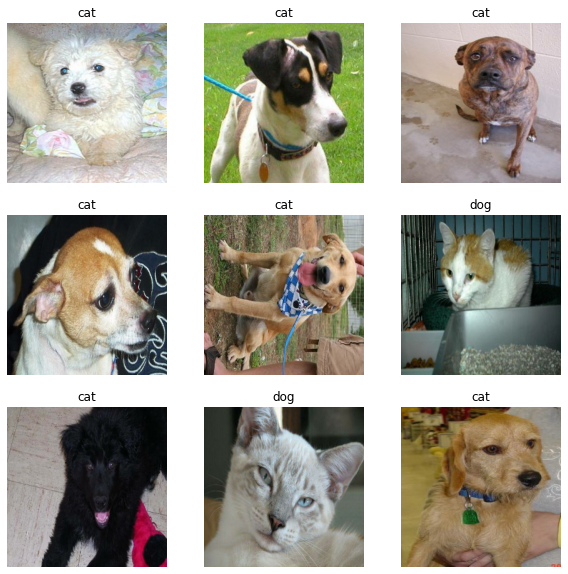

In [3]:
plt.figure(figsize=(10, 10))
train_x = np.zeros((80,256,256,3))
j=0
for images, labels in train_ds.take(3):
    siz = images.numpy().shape[0]
    train_x[j:siz+j] = images.numpy()
    j+=siz-1
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i] == 1:
            plt.title('cat')
        else:
            plt.title('dog')
        plt.axis("off")

plt.show()


test_x = np.zeros((20,256,256,3))
j=0
for images, labels in test_ds.take(1):
    siz = images.numpy().shape[0]
    test_x[j:siz+j] = images.numpy()
    j+=siz-1

plt.show()

In [4]:
test_x.shape

(20, 256, 256, 3)

In [5]:
import keras
from keras import layers
#########################
input_img = keras.Input(shape=(256, 256, 3))

x = layers.Conv2D(64, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D()(x)
#128x128x64
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)
#64x64x32
#x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(8, 3, activation='relu', padding='same')(x)
#encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.MaxPooling2D()(x)
#32x32x8
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2DTranspose(8, 3, strides=(2,2), activation='relu', padding='same')(encoded)
#64x64x8
x = layers.Conv2DTranspose(32, 3, strides=(2,2), activation='relu', padding='same')(x)
#128x128x32
x = layers.Conv2DTranspose(64, 3, strides=(2,2), activation='relu', padding='same')(x)
#256x256x64
decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         2312  

In [6]:
trainx = train_x/255.
testx = test_x/255.

In [7]:
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
# create gaussian noise
mean = 0
var = 0.1
sigma = np.sqrt(var)
n = np.random.normal(loc=mean, 
                     scale=sigma, 
                     size=(256,256,3))


In [23]:
autoencoder.fit(trainx,trainx,batch_size=1,epochs = 500)

Epoch 1/500
80/80 [==============================] - 43s 542ms/step - loss: 0.0035
Epoch 2/500
80/80 [==============================] - 46s 568ms/step - loss: 0.0036
Epoch 3/500
80/80 [==============================] - 40s 503ms/step - loss: 0.0039
Epoch 4/500
80/80 [==============================] - 39s 490ms/step - loss: 0.0036
Epoch 5/500
80/80 [==============================] - 38s 477ms/step - loss: 0.0037
Epoch 6/500
80/80 [==============================] - 38s 476ms/step - loss: 0.0037
Epoch 7/500
80/80 [==============================] - 38s 481ms/step - loss: 0.0036
Epoch 8/500
80/80 [==============================] - 38s 478ms/step - loss: 0.0036
Epoch 9/500
80/80 [==============================] - 43s 543ms/step - loss: 0.0035
Epoch 10/500
80/80 [==============================] - 46s 571ms/step - loss: 0.0035
Epoch 11/500
80/80 [==============================] - 47s 583ms/step - loss: 0.0036
Epoch 12/500
80/80 [==============================] - 45s 558ms/step - loss: 0.0035
E

80/80 [==============================] - 20s 247ms/step - loss: 0.0027
Epoch 195/500
80/80 [==============================] - 20s 248ms/step - loss: 0.0027
Epoch 196/500
80/80 [==============================] - 20s 249ms/step - loss: 0.0029
Epoch 197/500
80/80 [==============================] - 21s 259ms/step - loss: 0.0028
Epoch 198/500
80/80 [==============================] - 20s 249ms/step - loss: 0.0030
Epoch 199/500
80/80 [==============================] - 20s 248ms/step - loss: 0.0029
Epoch 200/500
80/80 [==============================] - 20s 250ms/step - loss: 0.0027
Epoch 201/500
80/80 [==============================] - 20s 250ms/step - loss: 0.0028
Epoch 202/500
80/80 [==============================] - 20s 248ms/step - loss: 0.0027
Epoch 203/500
80/80 [==============================] - 20s 249ms/step - loss: 0.0027
Epoch 204/500
80/80 [==============================] - 20s 255ms/step - loss: 0.0028
Epoch 205/500
80/80 [==============================] - 20s 250ms/step - loss: 0

80/80 [==============================] - 21s 266ms/step - loss: 0.0026
Epoch 387/500
80/80 [==============================] - 20s 251ms/step - loss: 0.0027
Epoch 388/500
80/80 [==============================] - 21s 256ms/step - loss: 0.0026
Epoch 389/500
80/80 [==============================] - 21s 265ms/step - loss: 0.0026
Epoch 390/500
80/80 [==============================] - 20s 255ms/step - loss: 0.0026
Epoch 391/500
80/80 [==============================] - 21s 266ms/step - loss: 0.0026
Epoch 392/500
80/80 [==============================] - 21s 257ms/step - loss: 0.0030
Epoch 393/500
80/80 [==============================] - 20s 255ms/step - loss: 0.0028
Epoch 394/500
80/80 [==============================] - 20s 255ms/step - loss: 0.0029
Epoch 395/500
80/80 [==============================] - 23s 290ms/step - loss: 0.0027
Epoch 396/500
80/80 [==============================] - 21s 266ms/step - loss: 0.0026
Epoch 397/500
80/80 [==============================] - 21s 258ms/step - loss: 0

In [24]:
predict = autoencoder.predict(testx)

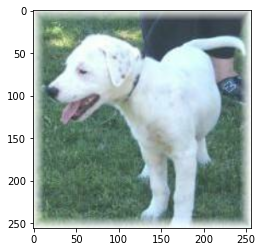

In [25]:
plt.imshow(testx[2])

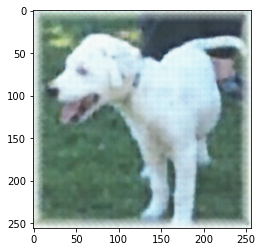

In [26]:
plt.imshow(predict[2])

In [27]:
encoder = keras.Model(input_img, encoded)

In [28]:
encoded_imgs = encoder.predict(testx)

In [29]:
n = np.random.normal(loc=mean, 
                     scale=sigma, 
                     size=encoded_imgs.shape[1:])
predict_g=[]
for image in encoded_imgs:
    predict_g.append(image+n)
predict_g=np.array(predict_g)    

In [30]:
encoded_input = keras.Input(shape=(32, 32, 8))

x = layers.Conv2DTranspose(8, 3, strides=(2,2), activation='relu', padding='same')(encoded_input)
x = layers.Conv2DTranspose(32, 3, strides=(2,2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(64, 3 , strides=(2,2),activation='relu', padding='same')(x)
last=layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 8)]       0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 64, 64, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 128, 128, 32)     2336      
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 256, 256, 64)     18496     
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 3)       1731      
                                                           

In [31]:
predict_g.shape

(20, 32, 32, 8)

In [32]:
k = 0
for i in range (6,14):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

In [33]:
decoded_imgs = decoder.predict(predict_g)

In [34]:
#decoded_imgs.shape
len(autoencoder.weights)

14

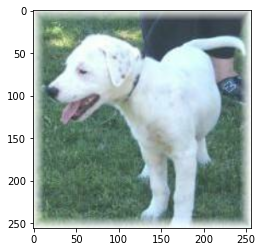

In [40]:
plt.imshow(testx[2])

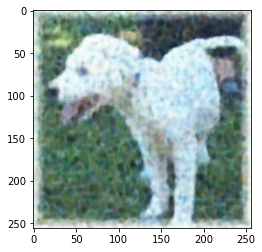

In [39]:
plt.imshow(decoded_imgs[2])